<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Regresion_logistica_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión logística Proyecto Final

[Curso de Regresión Logística con Python y scikit-learn](platzi.com/reglog)

## Importar librerías

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga de datos

In [ ]:
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Eliminamos el codigo id por ser irrelevante al analisis

In [ ]:
df.drop('id',axis=1,inplace=True)

## Generamos un informe del df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.shape

(569, 32)

Valores NaN

In [ ]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

##Eliminamos los valores Faltantes NaN

Como toda la categoria Unnamed: 32 es Nan puedo eliminar directamente la columna.

Si intento utilizar "df.dropna(inplace = True)" el df sufre el borrado de los datos.

In [ ]:
#df.dropna(inplace=True)
#df.head(5)

In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Convertir a numérico variable objetivo

In [ ]:
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

In [ ]:
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Manejo de variables categóricas (Codificacion One Not)

Como la unica variable objetc es la variable objetivo no tenemos necesidad de codificacion One Not.


Si generamos df_processing

In [ ]:
df_processing = df.copy()

## Balanceo de clases

observamos que el dataFrame esta balanceado

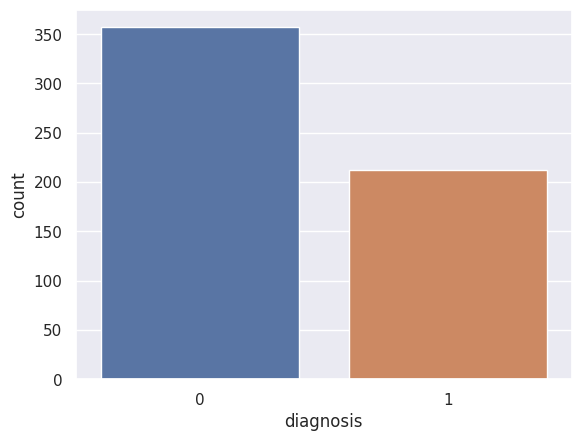

In [ ]:
sns.countplot(data=df, x='diagnosis')
plt.show()

#Analisis Correlacion

Analizamos correlacion con la variable objetivo en primera instancia, para determinar que caracteristicas son mas influyentes en la existencia de Tumor

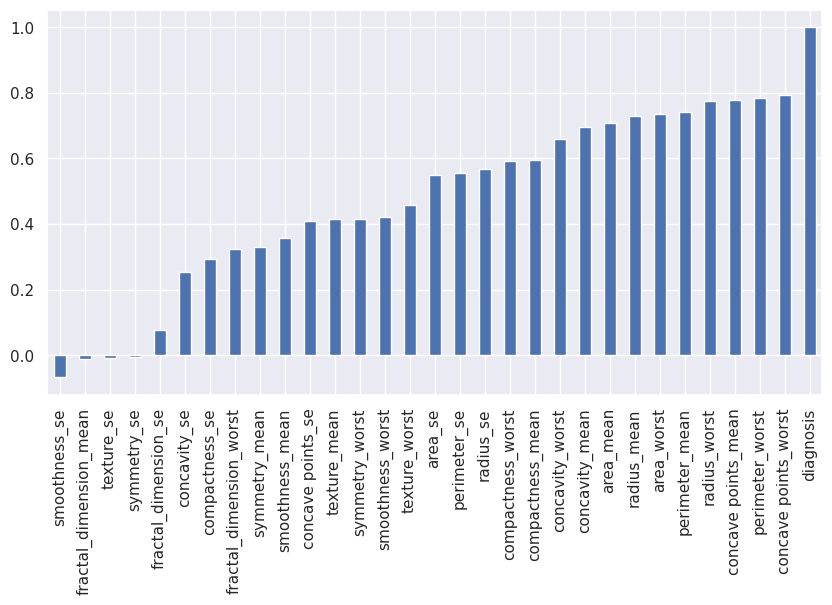

In [ ]:
fig = plt.figure(figsize=(10,5))
df_processing.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

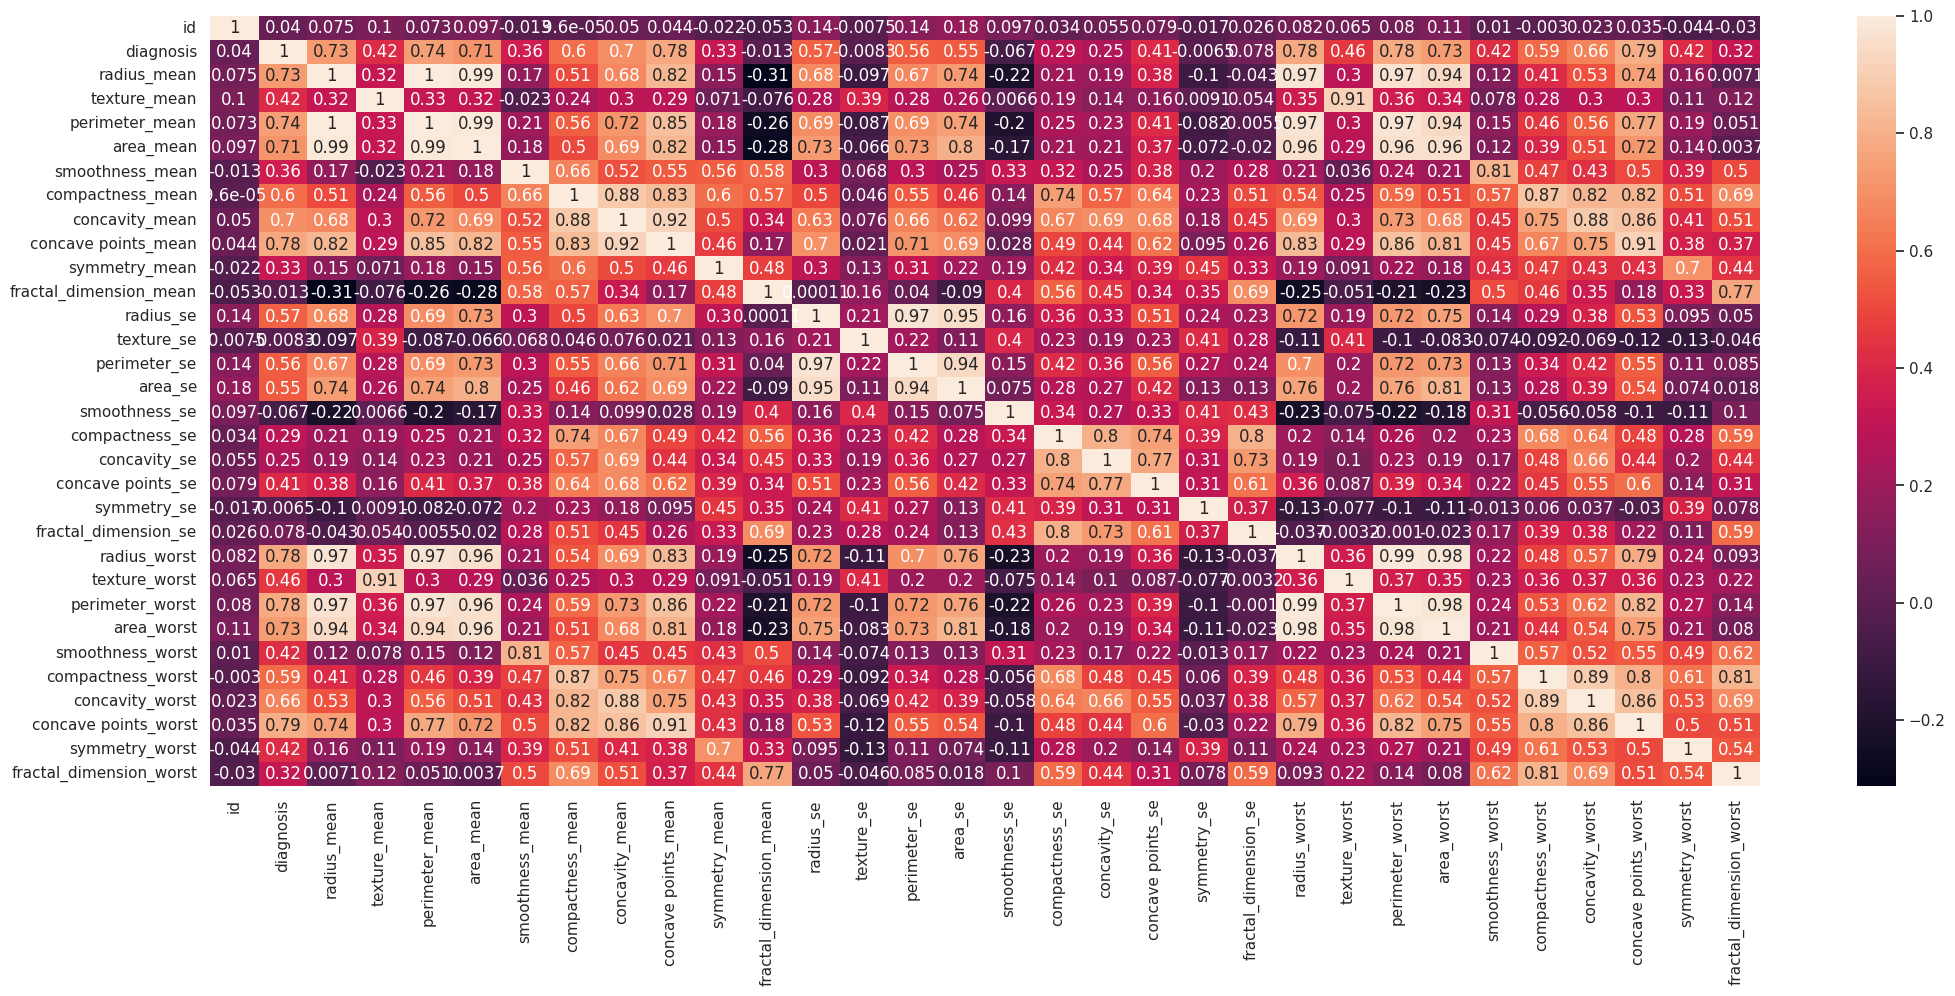

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df_processing.corr(), annot=True)
plt.show()

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


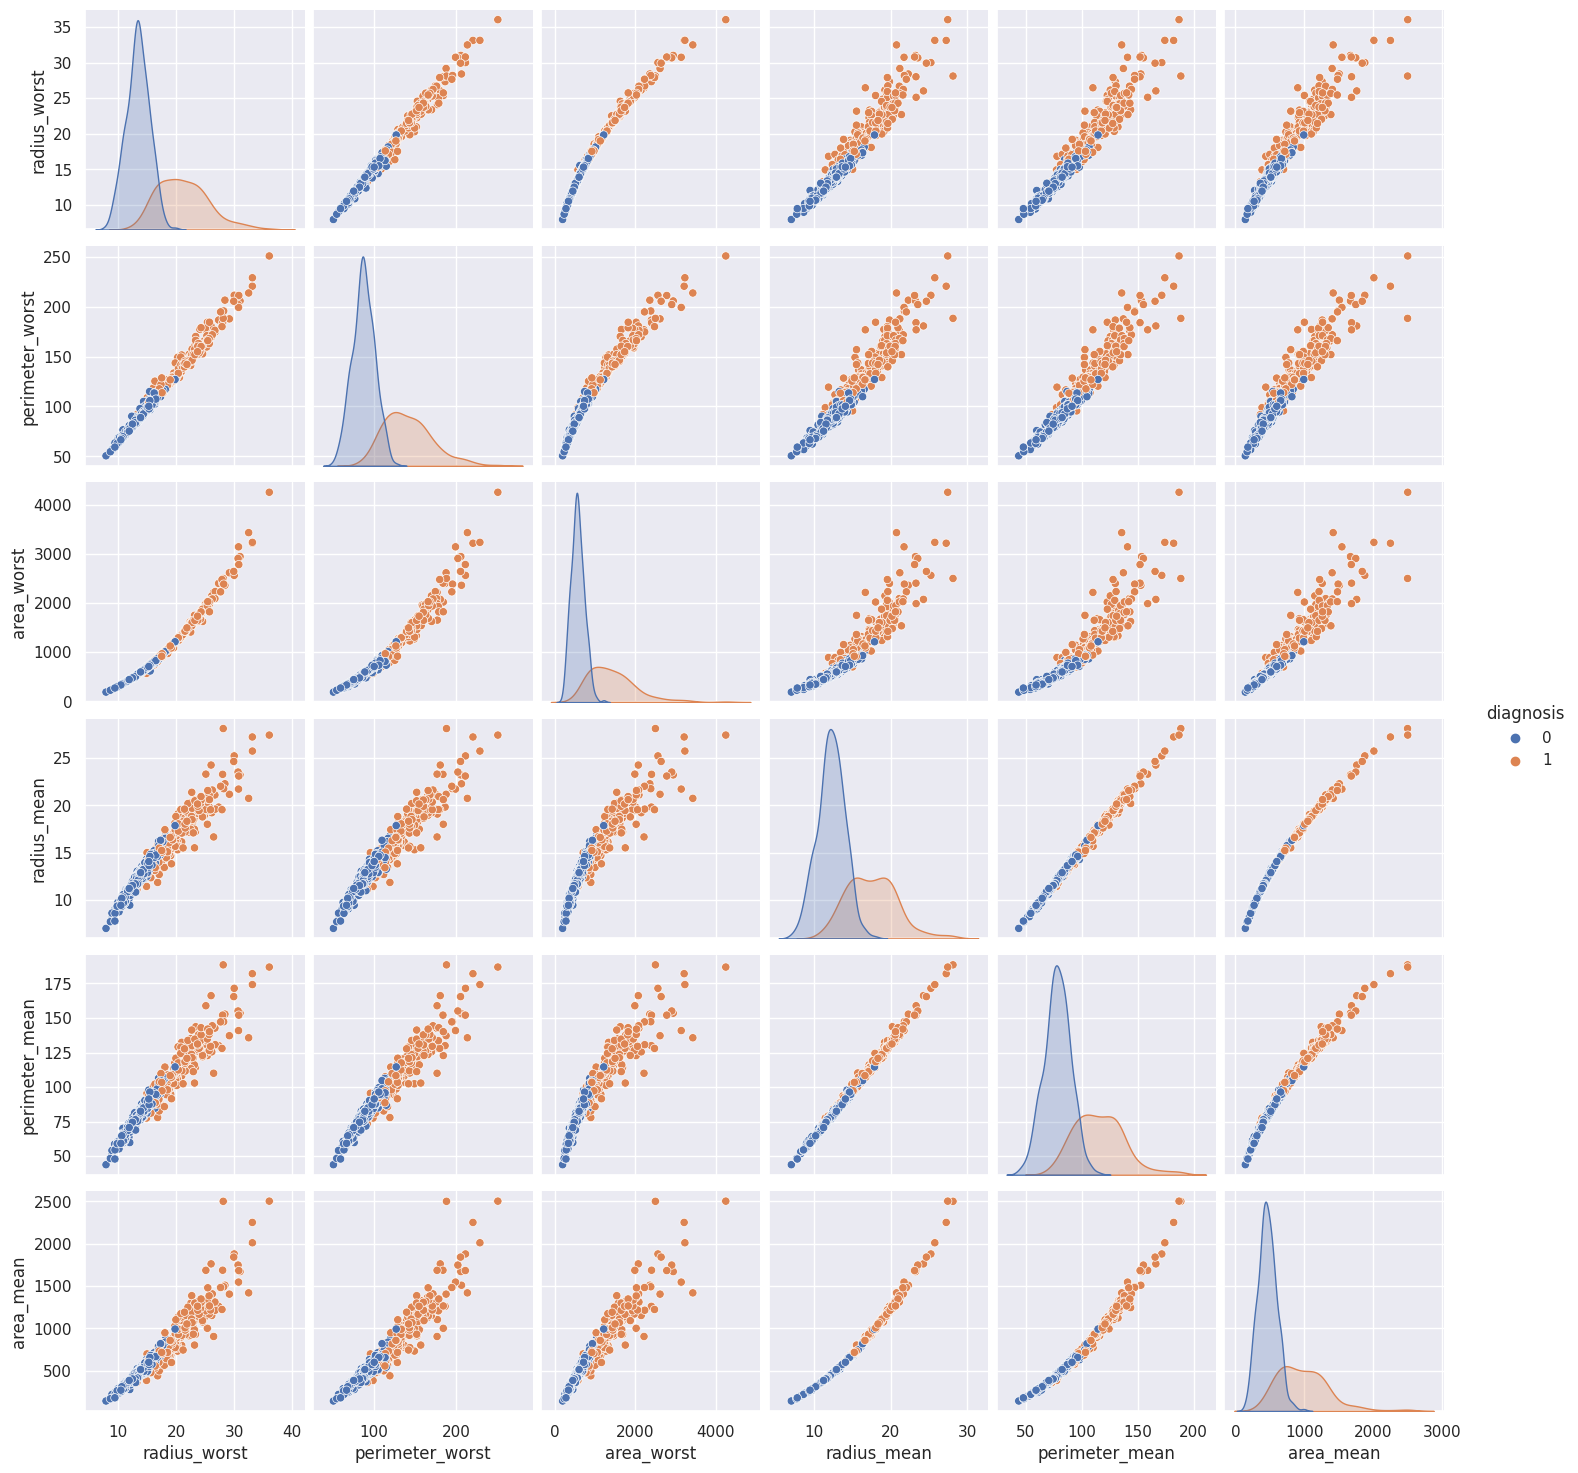

In [ ]:

sns.pairplot(df[['radius_worst','perimeter_worst',"area_worst", "radius_mean","perimeter_mean","area_mean","diagnosis"]],hue='diagnosis')


A partir de estos dos ultimo graficos vemos una correlacion fuerte radius_worst, area_worst, perimeter_worst, radius-mean, area_mean, perimeter_mean. Esta correlacion Lineal Fuerte entre variables sabemos que perjudica el entrenamiento del modelo.

Por lo que hay que tomar una decision de con que variables nos quedamos y cuales podemos descartar. Para ello buscamos informacion y asesoramiento de personas con conocimiento en la tematica.

Con dialogo con La doctora Carol Nilda De La Torre nos da una primera aproximacion de que en caso de Cancer de Mama las irregularidades del la superficie son un indicio de proclive malignidad.

En una primera aproximacion como son variables geometricas del tumor fuertemente correlacionadas decidimos quedarnos con perimeter_mean y perimeter_worst, eliminando los datos de radius y area


#Eliminamos datos correlacionados fuertemente

In [ ]:
df_processing.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)

In [ ]:
df_processing.head(5)

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Estandarizacion de Caracteristicas

In [ ]:
# Divide los datos en características (X) y etiquetas (y)
X = df_processing.drop('diagnosis',axis=1)
y = df_processing['diagnosis'].values

In [ ]:
#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

Escalamos las caracteristicas

In [ ]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

##Creacion del Modelo


In [ ]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158


##Evaluacion del modelo

In [ ]:
#Metricas
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
report = classification_report(y_test,predictions, labels = [0,1])

print(report)

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 1500x1500 with 0 Axes>

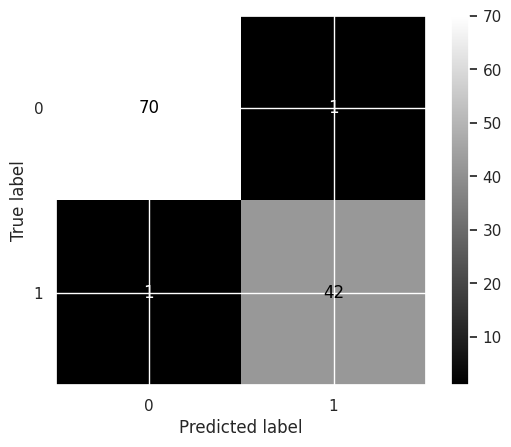

In [ ]:
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

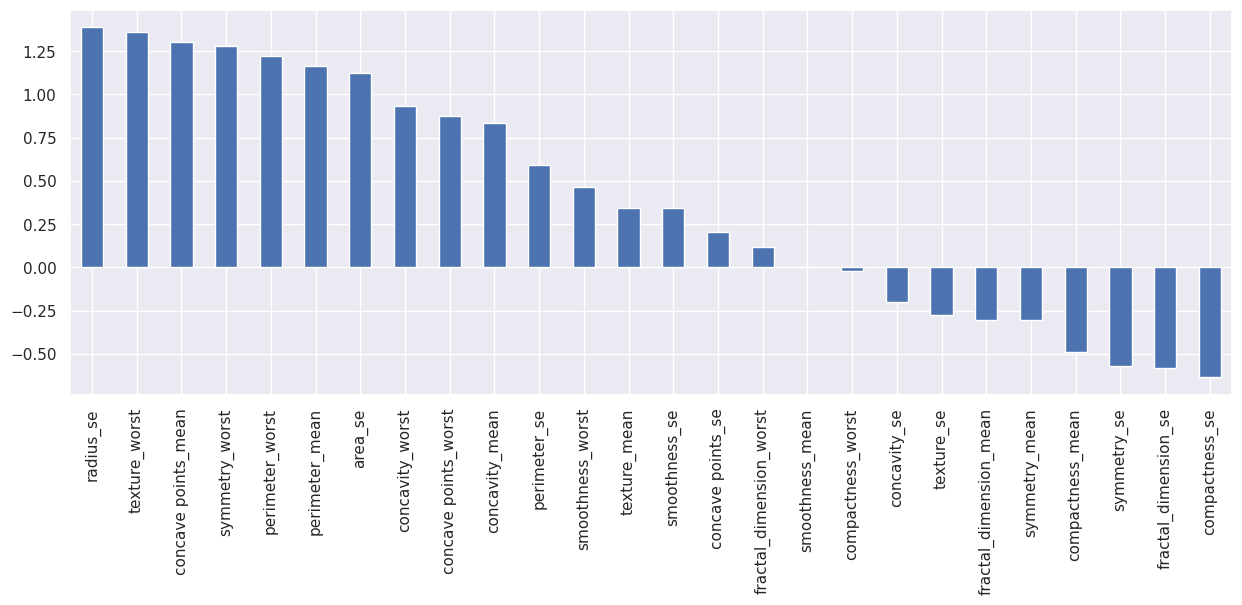

In [ ]:
#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

##Modelo teniendo en cuenta Outliers

Del informe del set de datos se deduce que cada caracteristica es el producto de varias mediciones sobre cada imagen de la que se saca un valor medio(mean), la desviacion estandar (se) y el valor mas grande de las mediciones realizadas (worst).

Al conjunto de valores worst los podemos interpretar como outliers de cada caracteristica

[[70  1]
 [ 1 42]]
0.9824561403508771


Metricas
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





<Figure size 1500x1500 with 0 Axes>

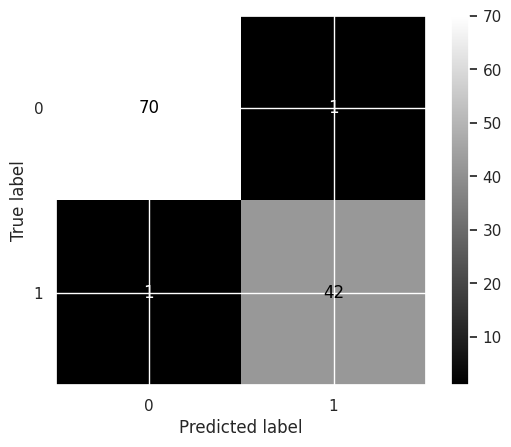

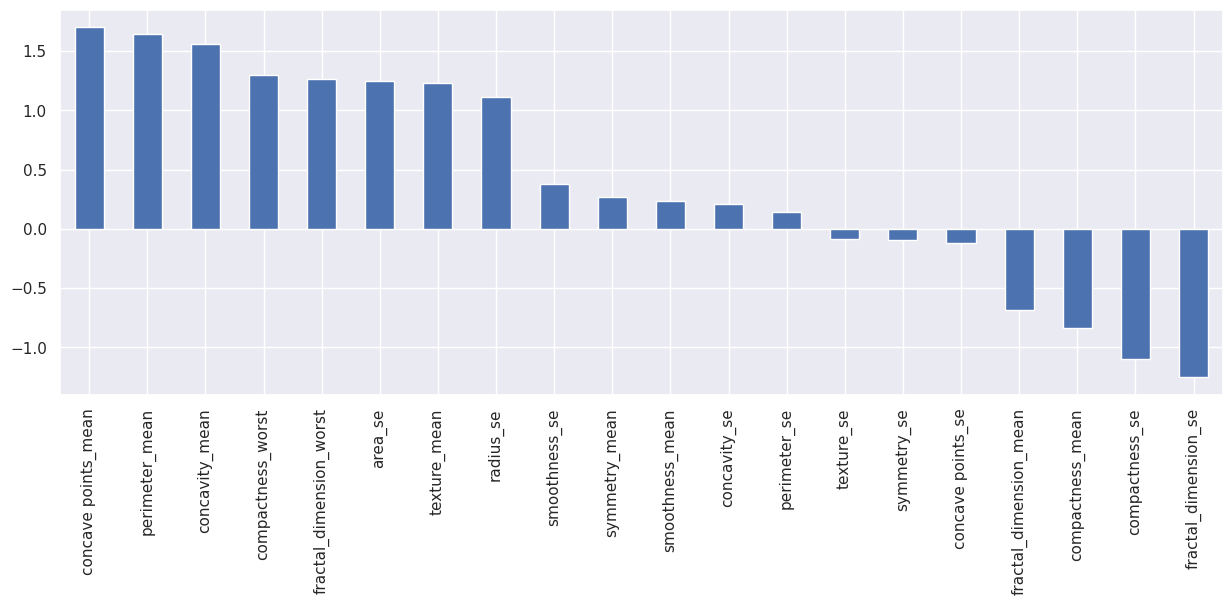

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


#Lee Datos
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

#Elimina id
df.drop('id',axis=1,inplace=True)

#Elimina NaN
df.drop('Unnamed: 32',axis=1,inplace=True)

#Variable objetivo a numerica
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

#Elimina correlacionados
df.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)


#Elimino ouliers
df.drop(["perimeter_worst","texture_worst","symmetry_worst","concavity_worst","concave points_worst","smoothness_worst"],axis = 1,inplace=True)

# Divide los datos en características (X) y etiquetas (y)
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values

#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

model=LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("")
print("")

#Metricas
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions, labels = [0,1])
print("Metricas")
print(report)

print("")
print("")



#matriaz de confucion
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print("")

#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

##Modelo con Regularizacion L1 Lasso

[[69  2]
 [ 2 41]]
0.9649122807017544


Metricas
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114





<Figure size 1500x1500 with 0 Axes>

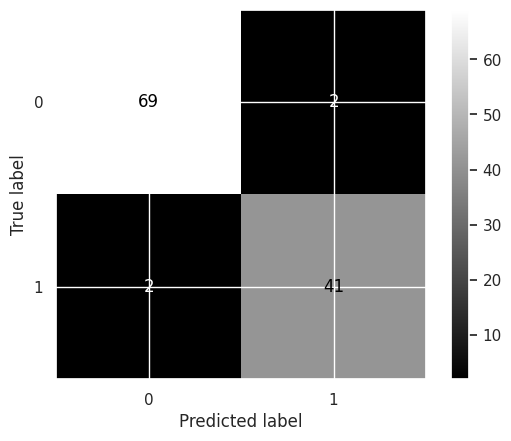

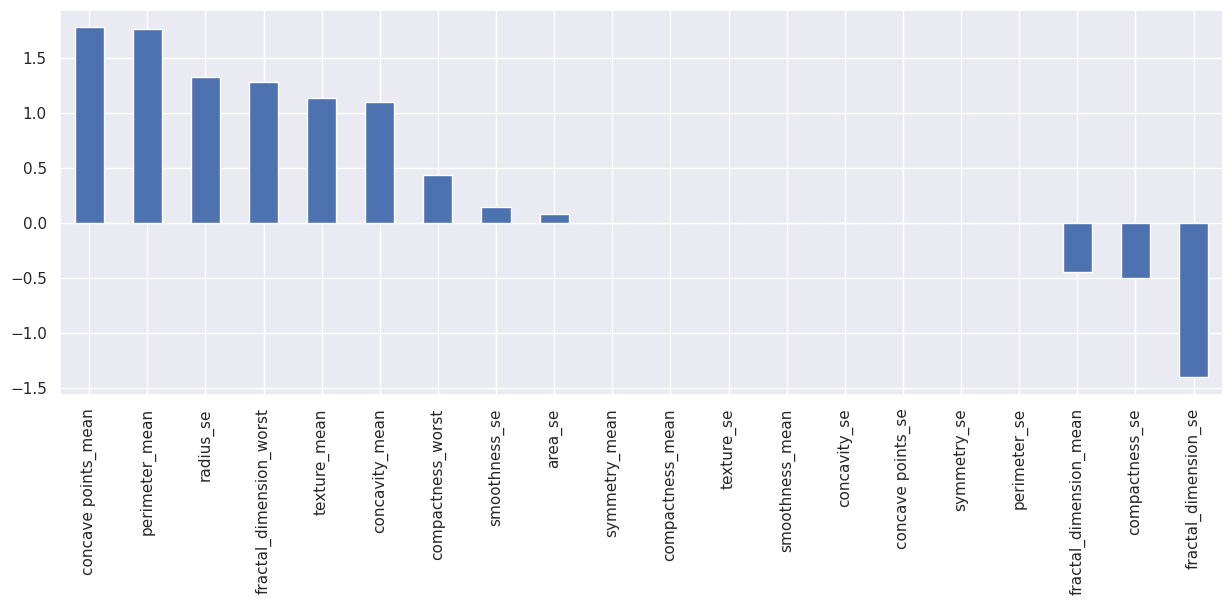

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


#Lee Datos
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

#Elimina id
df.drop('id',axis=1,inplace=True)

#Elimina NaN
df.drop('Unnamed: 32',axis=1,inplace=True)

#Variable objetivo a numerica
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

#Elimina correlacionados
df.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)


#Elimino ouliers
df.drop(["perimeter_worst","texture_worst","symmetry_worst","concavity_worst","concave points_worst","smoothness_worst"],axis = 1,inplace=True)

# Divide los datos en características (X) y etiquetas (y)
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values

#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

model=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("")
print("")

#Metricas
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions, labels = [0,1])
print("Metricas")
print(report)

print("")
print("")



#matriaz de confucion
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print("")

#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

##Modelo Regularizacion L2 Ridge

[[70  1]
 [ 1 42]]
0.9824561403508771


Metricas
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





<Figure size 1500x1500 with 0 Axes>

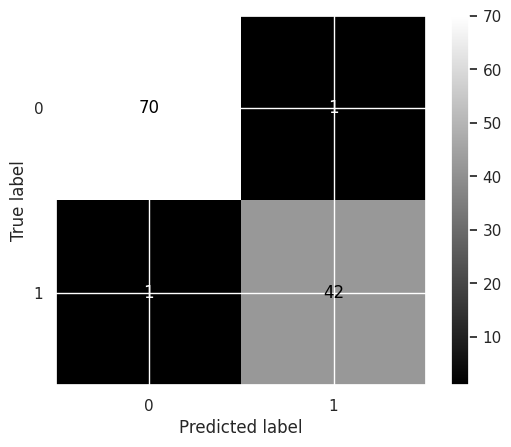

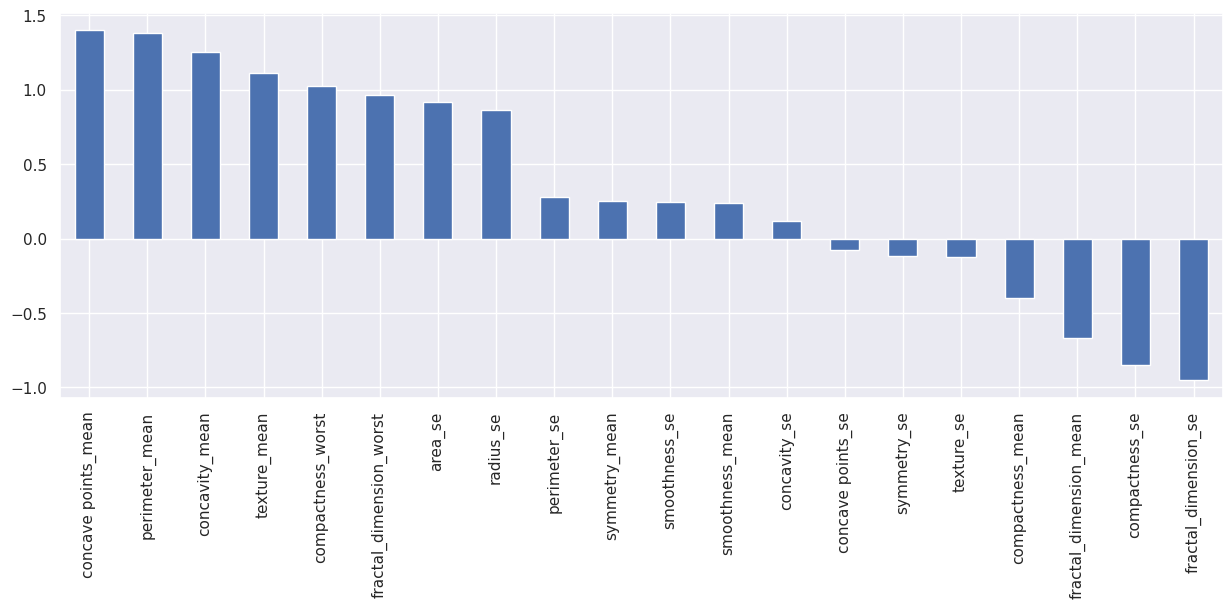

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


#Lee Datos
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

#Elimina id
df.drop('id',axis=1,inplace=True)

#Elimina NaN
df.drop('Unnamed: 32',axis=1,inplace=True)

#Variable objetivo a numerica
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

#Elimina correlacionados
df.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)


#Elimino ouliers
df.drop(["perimeter_worst","texture_worst","symmetry_worst","concavity_worst","concave points_worst","smoothness_worst"],axis = 1,inplace=True)

# Divide los datos en características (X) y etiquetas (y)
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values

#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

model=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("")
print("")

#Metricas
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions, labels = [0,1])
print("Metricas")
print(report)

print("")
print("")



#matriaz de confucion
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print("")

#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

##Por ultimo podemos analizar un modelo sin eliminar caracteristicas correlacionadas ni outliers



[[70  1]
 [ 2 41]]
0.9736842105263158


Metricas
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<Figure size 1500x1500 with 0 Axes>

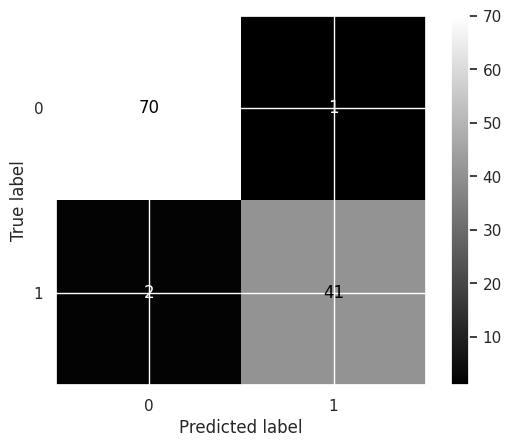

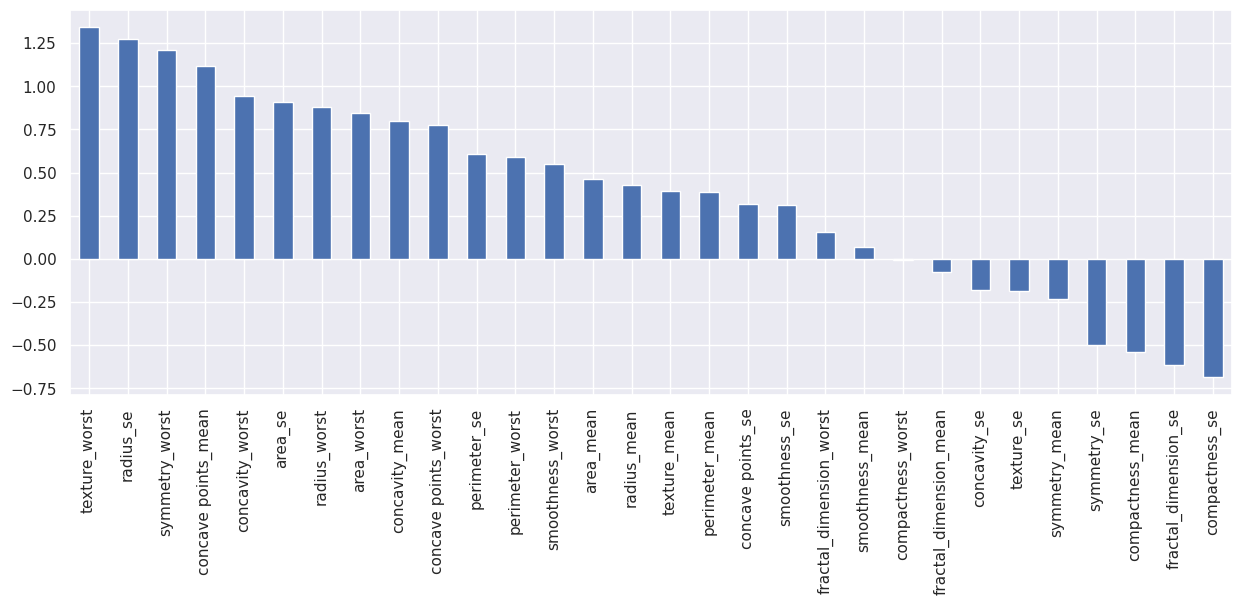

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


#Lee Datos
df = pd.read_csv('/content/BreastCancerWisconsin.csv')

#Elimina id
df.drop('id',axis=1,inplace=True)

#Elimina NaN
df.drop('Unnamed: 32',axis=1,inplace=True)

#Variable objetivo a numerica
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

#Elimina correlacionados
#df.drop(['radius_mean','area_mean', "area_worst", "radius_worst"], axis=1, inplace=True)


#Elimino ouliers
#df.drop(["perimeter_worst","texture_worst","symmetry_worst","concavity_worst","concave points_worst","smoothness_worst"],axis = 1,inplace=True)

# Divide los datos en características (X) y etiquetas (y)
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values

#Dividimos el set en datos de entrenmiento y testeo
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

model=LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("")
print("")

#Metricas
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions, labels = [0,1])
print("Metricas")
print(report)

print("")
print("")



#matriaz de confucion
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print("")

#coeficientes
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

# Concluciones

El data set consiste en mediciones sobre imagenes que intententan determinar la existencia de Tumaores de Mama canserigenos.

Sobre cada imagen se realizan mediciones varias oteniendo La mediana de la medida(mean), la desviacion estandar(se) y la medida maxima (Worst)

Tenemos una caracteristica id (numero de identificacion) que para los fines de estudio no aporta informacion que es eliminada.

Tenemos una caracteristica "Unnamed: 32" que contiene todos datos nulos NaN que es eliminada.

A travez del Analisis exploratorio y de Visualizacion de los datos por medio de HeatMap y grafico de Pares encontramos fuertes correlaciones.

Si se considera las mediciones worst como outliers y se eliminan, Tenemos un Incremento de la exactitud.

##Eliminando outliers considerando estos presentes en las caracteristicas worst AUMENTA EL ACCURACY.

CON RESPECTO A LAS REGULACIONES LA MEJOR PERFORMANCE LA OBTIENE CON L2 LASSO

